# Lab Feature extraction

Jorge Castro DAPT NOV2021

From previous lab: Lab Cleaning categorical data
##### 1.- Import the necessary libraries if you are starting a new notebook

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

In [6]:
df.columns = [df.columns[col_name].lower().replace(' ','_') for col_name in range(len(df.columns))]

In [7]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

##### 12.- What should we do with the customer id column?

In [8]:
df.set_index('customer', inplace=True)

In [9]:
df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

##### 8.- Check NaN values per column.

In [11]:
df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
cat_filter = []
dis_filter = []
con_filter = []    

In [13]:
df_cat_cols = df.select_dtypes(exclude=['number', 'datetime']).columns.tolist()

In [14]:
df_num_cols = df.select_dtypes(include=['number', 'datetime']).columns.tolist()

In [15]:
for col in df_cat_cols:
    print(col.upper(), 'has', len(df[col].unique()), 'unique values.')
    print('The unique values are: ', df[col].unique())
    print('Storing', col.upper(), 'as a categorical variable.')
    cat_filter.append(col)

STATE has 5 unique values.
The unique values are:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Storing STATE as a categorical variable.
RESPONSE has 2 unique values.
The unique values are:  ['No' 'Yes']
Storing RESPONSE as a categorical variable.
COVERAGE has 3 unique values.
The unique values are:  ['Basic' 'Extended' 'Premium']
Storing COVERAGE as a categorical variable.
EDUCATION has 5 unique values.
The unique values are:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Storing EDUCATION as a categorical variable.
EMPLOYMENTSTATUS has 5 unique values.
The unique values are:  ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Storing EMPLOYMENTSTATUS as a categorical variable.
GENDER has 2 unique values.
The unique values are:  ['F' 'M']
Storing GENDER as a categorical variable.
LOCATION_CODE has 3 unique values.
The unique values are:  ['Suburban' 'Rural' 'Urban']
Storing LOCATION_CODE as a categorical variable.
MARITAL_STATUS has 3 unique va

In [16]:
for col in df_num_cols:
    print(col.upper(), 'has', len(df[col].unique()), 'unique values.')
    if len(df[col].unique()) < len(df)/2:
        print('Storing', col.upper(), 'as a continuous variable')
        dis_filter.append(col)
    else:
        print('This is a continuous variable')
        print('Storing ', col.upper(), 'as a continuous variable')
        con_filter.append(col)

CUSTOMER_LIFETIME_VALUE has 8041 unique values.
This is a continuous variable
Storing  CUSTOMER_LIFETIME_VALUE as a continuous variable
EFFECTIVE_TO_DATE has 59 unique values.
Storing EFFECTIVE_TO_DATE as a continuous variable
INCOME has 5694 unique values.
This is a continuous variable
Storing  INCOME as a continuous variable
MONTHLY_PREMIUM_AUTO has 202 unique values.
Storing MONTHLY_PREMIUM_AUTO as a continuous variable
MONTHS_SINCE_LAST_CLAIM has 36 unique values.
Storing MONTHS_SINCE_LAST_CLAIM as a continuous variable
MONTHS_SINCE_POLICY_INCEPTION has 100 unique values.
Storing MONTHS_SINCE_POLICY_INCEPTION as a continuous variable
NUMBER_OF_OPEN_COMPLAINTS has 6 unique values.
Storing NUMBER_OF_OPEN_COMPLAINTS as a continuous variable
NUMBER_OF_POLICIES has 9 unique values.
Storing NUMBER_OF_POLICIES as a continuous variable
TOTAL_CLAIM_AMOUNT has 5106 unique values.
This is a continuous variable
Storing  TOTAL_CLAIM_AMOUNT as a continuous variable


In [17]:
def cat_dis_con(df):
    cat_filter = []
    dis_filter = []
    con_filter = [] 

    df_cat_cols = df.select_dtypes(exclude=['number', 'datetime']).columns.tolist()
    df_num_cols = df.select_dtypes(include=['number', 'datetime']).columns.tolist()

    for col in df_cat_cols:
        print(col.upper(), 'has', len(df[col].unique()), 'unique values.')
        print('The unique values are: ', df[col].unique())
        print('Storing', col.upper(), 'as a categorical variable.')
        cat_filter.append(col)

    for col in df_num_cols:
        print(col.upper(), 'has', len(df[col].unique()), 'unique values.')
        if len(df[col].unique()) < len(df)/2:
            print('Storing', col.upper(), 'as a continuous variable')
            dis_filter.append(col)
        else:
            print('This is a continuous variable')
            print('Storing ', col.upper(), 'as a continuous variable')
            con_filter.append(col)

    return df[cat_filter], df[dis_filter], df[con_filter]

In [18]:
df_cat, df_dis, df_con = cat_dis_con(df)

STATE has 5 unique values.
The unique values are:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Storing STATE as a categorical variable.
RESPONSE has 2 unique values.
The unique values are:  ['No' 'Yes']
Storing RESPONSE as a categorical variable.
COVERAGE has 3 unique values.
The unique values are:  ['Basic' 'Extended' 'Premium']
Storing COVERAGE as a categorical variable.
EDUCATION has 5 unique values.
The unique values are:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Storing EDUCATION as a categorical variable.
EMPLOYMENTSTATUS has 5 unique values.
The unique values are:  ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Storing EMPLOYMENTSTATUS as a categorical variable.
GENDER has 2 unique values.
The unique values are:  ['F' 'M']
Storing GENDER as a categorical variable.
LOCATION_CODE has 3 unique values.
The unique values are:  ['Suburban' 'Rural' 'Urban']
Storing LOCATION_CODE as a categorical variable.
MARITAL_STATUS has 3 unique va

In [19]:
df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [20]:
df_dis.head()

,effective_to_date,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer,,,,,,
BU79786,2011-02-24,69,32,5,0,1
QZ44356,2011-01-31,94,13,42,0,8
AI49188,2011-02-19,108,18,38,0,2
WW63253,2011-01-20,106,18,65,0,7
HB64268,2011-02-03,73,12,44,0,1


In [21]:
df_con.head()

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,2763.519279,56274,384.811147
QZ44356,6979.535903,0,1131.464935
AI49188,12887.431650,48767,566.472247
WW63253,7645.861827,0,529.881344
HB64268,2813.692575,43836,138.130879


##### Plot a correlation matrix

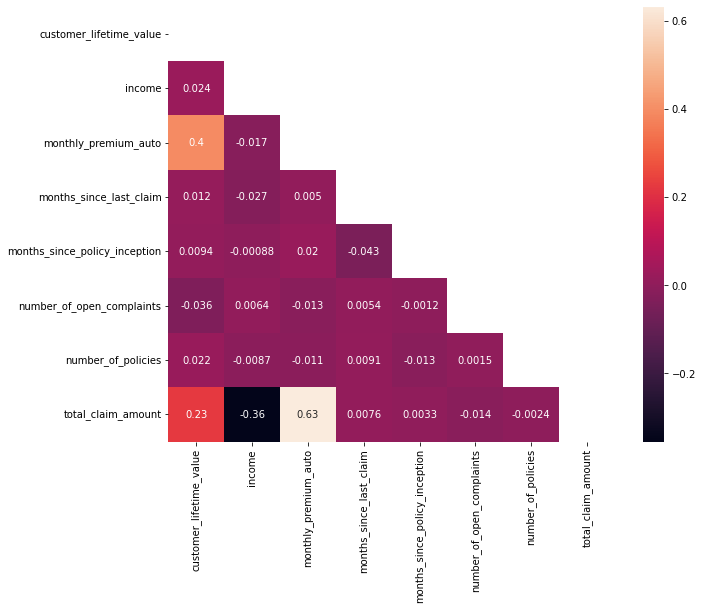

In [22]:
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

##### 4.- Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

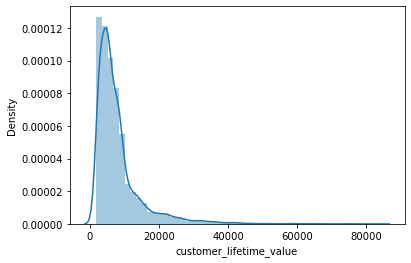

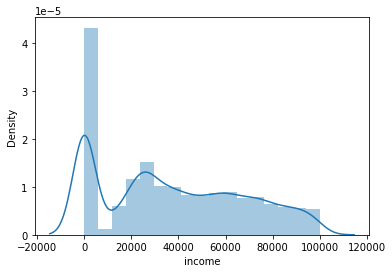

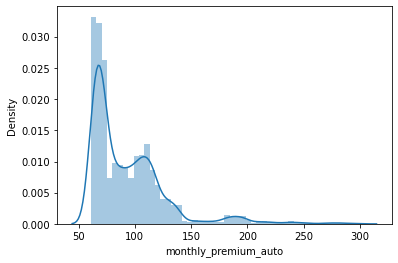

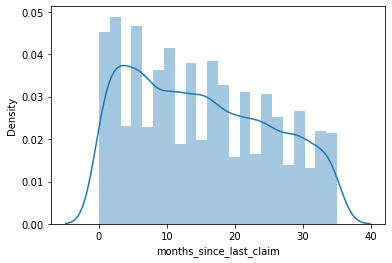

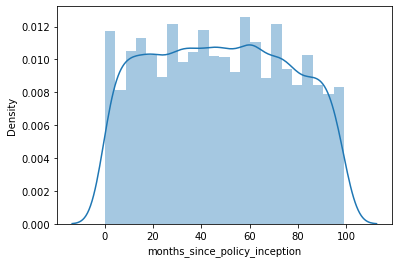

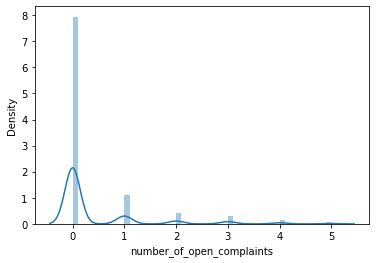

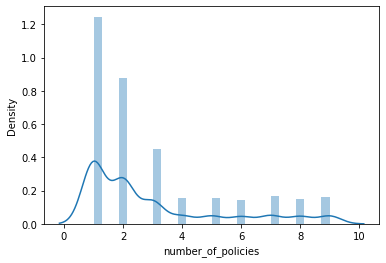

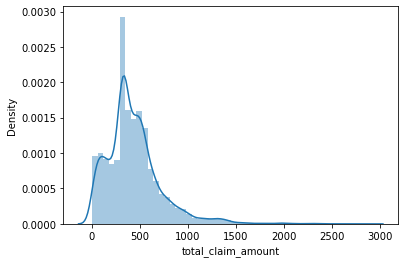

In [23]:
for column in df.select_dtypes(np.number).columns:
        sns.distplot(df[column])
        plt.show()

In [24]:
def plot_vars(df):
    for column in df.select_dtypes(np.number).columns:
        sns.distplot(df[column])
        plt.show()

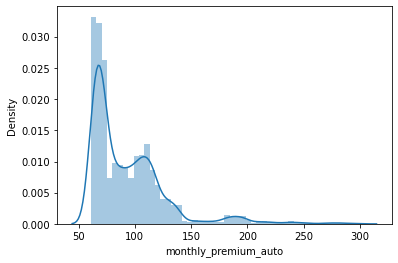

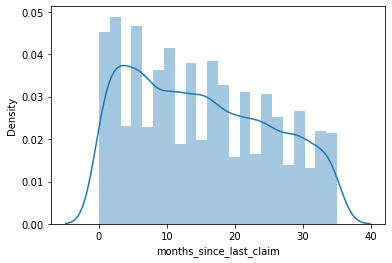

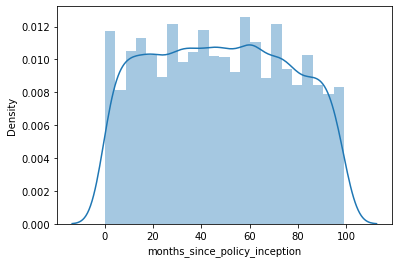

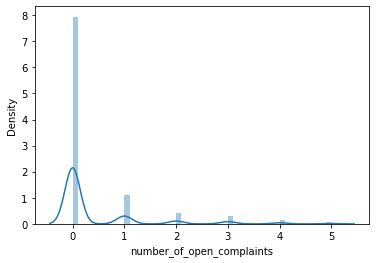

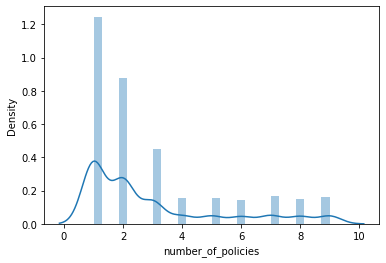

In [25]:
plot_vars(df_dis)

##### 6.- Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

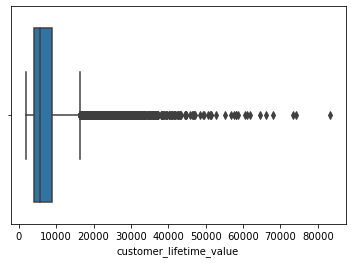

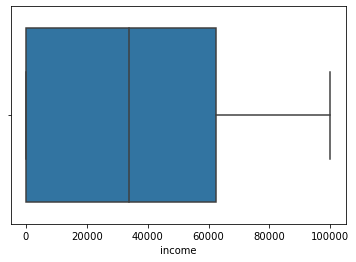

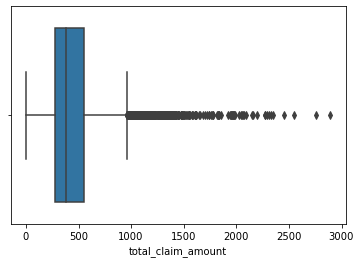

In [26]:
for column in df_con.columns:
    sns.boxplot(df_con[column])
    plt.show()

##### 7.- Have you found outliers? If you have, what should we do with them?

Removing outliers

In [27]:
import scipy.stats as stats

In [28]:
#find Q1, Q3, and interquartile range for each column
Q1 = df_con.quantile(q=.25)
Q3 = df_con.quantile(q=.75)
IQR = df_con.apply(stats.iqr)

In [29]:
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df_con_clean = df_con[~((df_con < (Q1-1.5*IQR)) | (df_con > (Q3+1.5*IQR))).any(axis=1)]

In [30]:
#find how many rows are left in the dataframe now
df_con_clean.shape

(7982, 3)

In [31]:
# before cleaning
df_con.shape

(9134, 3)

In [32]:
df_con_clean.head()

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,2763.519279,56274,384.811147
AI49188,12887.431650,48767,566.472247
WW63253,7645.861827,0,529.881344
HB64268,2813.692575,43836,138.130879
OC83172,8256.297800,62902,159.383042


## Start Lab Feature extraction

1) Open the categoricals variable we created before.

2) Plot all the categorical variables with the proper plot. What can you see?

3) There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

4) Plot time variable. Can you extract something from it?

1) Open the categoricals variable we created before.

In [34]:
df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2) Plot all the categorical variables with the proper plot. What can you see?

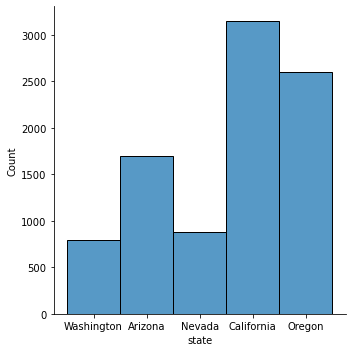

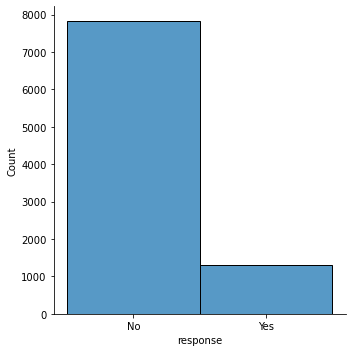

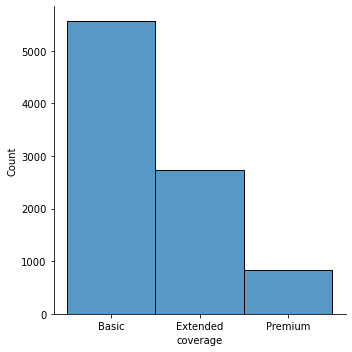

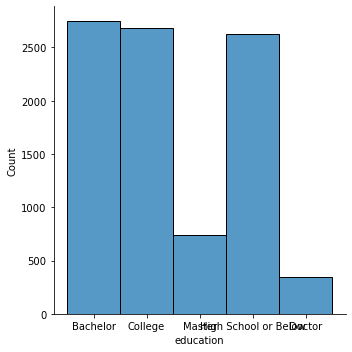

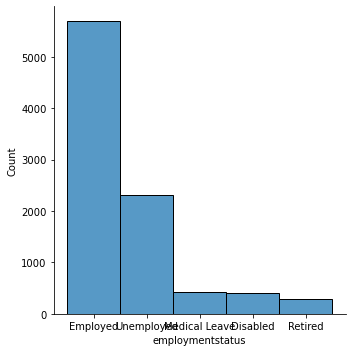

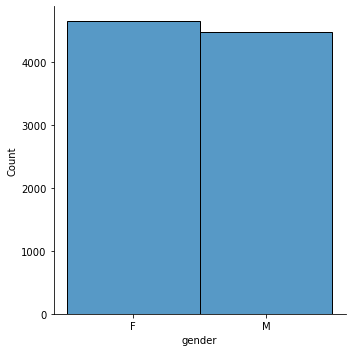

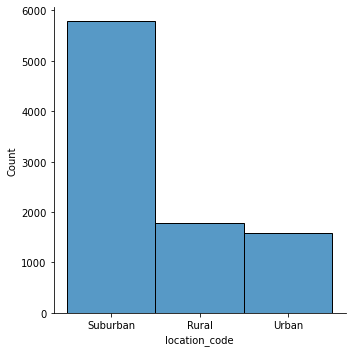

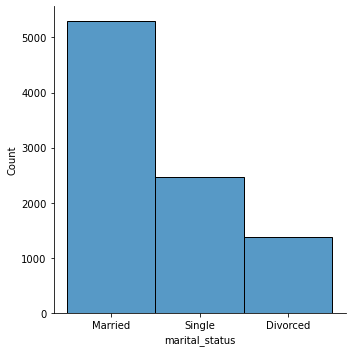

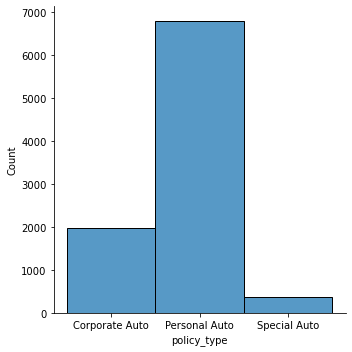

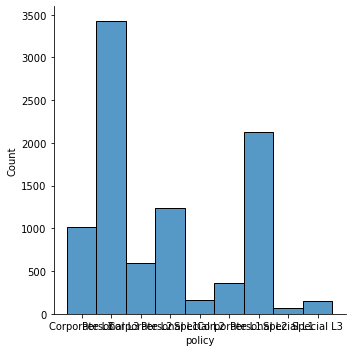

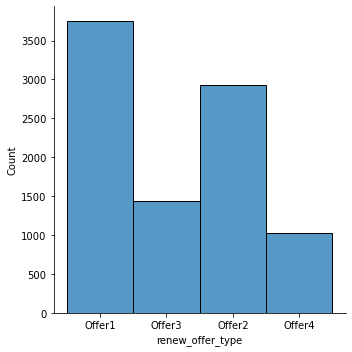

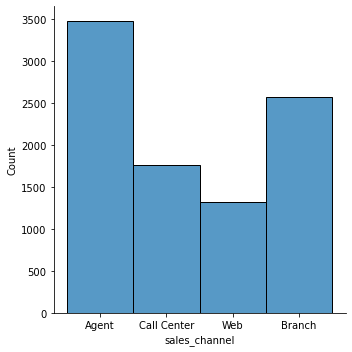

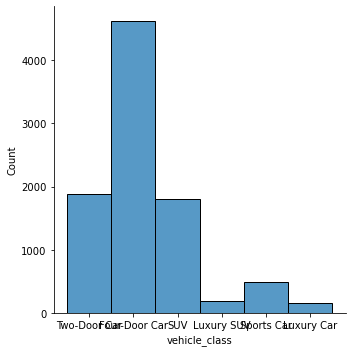

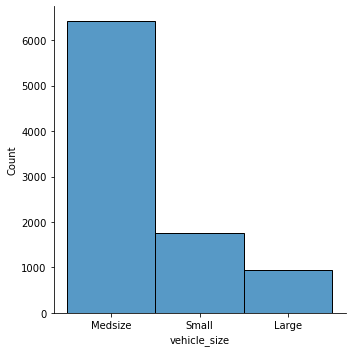

In [39]:
for col in df_cat.columns:
    sns.displot(x=df_cat[col])
    plt.show()

3) There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [41]:
for col in df_cat.columns:
    print('Unique values for column: ', col.upper(), 'are: ', df[col].unique())
# Printing an overview of the columns and the unique values is 
# usefull to see if there are redundant columns

Unique values for column:  STATE are:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values for column:  RESPONSE are:  ['No' 'Yes']
Unique values for column:  COVERAGE are:  ['Basic' 'Extended' 'Premium']
Unique values for column:  EDUCATION are:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values for column:  EMPLOYMENTSTATUS are:  ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values for column:  GENDER are:  ['F' 'M']
Unique values for column:  LOCATION_CODE are:  ['Suburban' 'Rural' 'Urban']
Unique values for column:  MARITAL_STATUS are:  ['Married' 'Single' 'Divorced']
Unique values for column:  POLICY_TYPE are:  ['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique values for column:  POLICY are:  ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values for column:  RENEW_OFFER_TYPE are:  ['Offer1' 'Offer3' 'Offer2' 'Offer4']

In [42]:
# It seems to me that the column 'policy' 
# has elements of values from 'policy_type'

4) Plot time variable. Can you extract something from it?